
# Project: [TMDb_Movies Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> this data set contains information about 10 thousand movies collected from The Movie Database (TMDb), including user ratings and revenue. It consist of 21 columns such as imdb_id, revenue, budget, vote_count etc.


### Question(s) for Analysis
>
1) Movies which had most and least profit

2) Movies with largest and lowest budgets

3) Movies with most and least earned revenu.

4) Movies with longest and shortest runtime values

5) Average runtime of all the movies.

6) In which year we had most no.of profitable movies.

# Some calculations

1) Successful genres (with respest to the profitable movies).

2) Most frequent cast (with respest to the profitable movies)

3) Average budget (with respest to the profitable movies)

4) Average revenue (with respest to the profitable movies)

5) Average duration of the movie (with respest to the profitable movies)

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
#importing important files 
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
pd.options.display.max_columns= None
pd.options.display.max_rows= None

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [3]:
import pandas as pd

<a id='wrangling'></a>
## Data Wrangling

> Here, we will be keeping only relevent data deleting the unsued data so that we can make our calculation easy and understandable. .

In [4]:
df = pd.read_csv('tmdb-movies.csv')


In [5]:
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



### Data Cleaning
> Data Cleaning (Removing the unused information from the dataset )
Important observation regarding this process

We need to remove unused column such as id, imdb_id, vote_count, production_company, keywords, homepage etc.

1) Removing the duplicacy in the rows(if any).

2) Some movies in the database have zero budget or zero revenue, that is there value has not been recorded so we will be discarding such entries

3) Changing release date column into date format.

4) Replacing zero with NAN in runtime column.

5) Changing format of budget and revenue column.

6) Columns that we need to delete are - id, imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, overview, production_companies, vote_count and vote_average.
 

In [6]:
#Remove unused columns
#creating a list of columb to be deleted
del_col=[ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

#deleting the columns
df= df.drop(del_col,1)

#previewing the new dataset
df.head(4)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015


In [7]:
#Removing the duplicacy in the rows
rows, col = df.shape
#We need to reduce the count of row by one as contain header row also.
print('There are {} total entries of movies and {} no.of columns in it.'.format(rows-1, col))

There are 10865 total entries of movies and 10 no.of columns in it.


In [8]:
df.drop_duplicates(keep ='first', inplace=True)
rows, col = df.shape

print('There are now {} total entries of movies and {} no.of columns in it.'.format(rows-1, col))

There are now 10864 total entries of movies and 10 no.of columns in it.


In [9]:
#Removing 0's from budget and the revenue columns

temp_list=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
df[temp_list] = df[temp_list].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
df.dropna(subset = temp_list, inplace = True)

rows, col = df.shape
print('So after removing such entries, we now have only {} no.of movies.'.format(rows-1))

So after removing such entries, we now have only 3853 no.of movies.


In [10]:
#Changing the release date column into standard date format
df.release_date = pd.to_datetime(df['release_date'])
df.head(3)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015


In [11]:
#Replacing zero with NAN in runtime column.

df['runtime'] =df['runtime'].replace(0, np.NAN)

In [12]:
 #Changing format of budget and revenue column.
    
df.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [13]:
change_type=['budget', 'revenue']
#changing data type
df[change_type]=df[change_type].applymap(np.int64)
#printing the changed information
df.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

>Question 1)  Calculating the profit of the each movie


In [14]:
#insert function with three parameters(index of the column in the dataset, name of the column, value to be inserted)
df.insert(2,'profit_earned',df['revenue']-df['budget'])

#previewing the changes in the dataset
df.head(2)


,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


In [15]:
import pprint
#defining the function
def calculate(column):
    #for highest earned profit
    high= df[column].idxmax()
    high_details=pd.DataFrame(df.loc[high])
    
    #for lowest earned profit
    low= df[column].idxmin()
    low_details=pd.DataFrame(df.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

#calling the function
calculate('profit_earned')
    

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit_earned,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


Column with id 1386 shows the highest earned profit i.e 2544505847 .

Whereas the column with id 2244 shows the lowest earned profit i.e -413912431

Question 2) : Movies with largest and lowest budgets

In [16]:
# we will call the same function **calculate(column)** again for this analysis
calculate('budget')

,2244,2618
budget,425000000,1
revenue,11087569,100
profit_earned,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


Column with id 2244 shows the largest budget i.e 425000000 dollar.

Whereas the column with id 2618 shows the smallest budget i.e 1 dollar

Question 3) : Movies with most and least earned revenue

In [17]:
# we will call the same function **calculate(column)** again for this analysis
calculate('revenue')

,1386,5067
budget,237000000,6000000
revenue,2781505847,2
profit_earned,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00


Column with id 1386 shows the largest revenue earned i.e 2781505847 dollar.

Whereas the column with id 5067 shows the smallest revenue earned i.e 2 dollar

Question 4) : Movies with longest and shortest runtime

In [18]:
# we will call the same function **calculate(column)** again for this analysis
calculate('runtime')

,2107,5162
budget,18000000,10
revenue,871279,5
profit_earned,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00


Column with id 2107 shows the longest runtime i.e 338 minutes.

Whereas the column with id 5162 shows the shortest runtime i.e 15 minutes

Question 5) : Average runtime of the movies

In [19]:
# defining a function to find average of a column
def avg_fun(column):
    return df[column].mean()

In [20]:
#calling above function
avg_fun('runtime')

109.22029060716139

So the average runtime a movie is 109 minutes. Lets analyse it in a visual form i.e. by graphical approach.

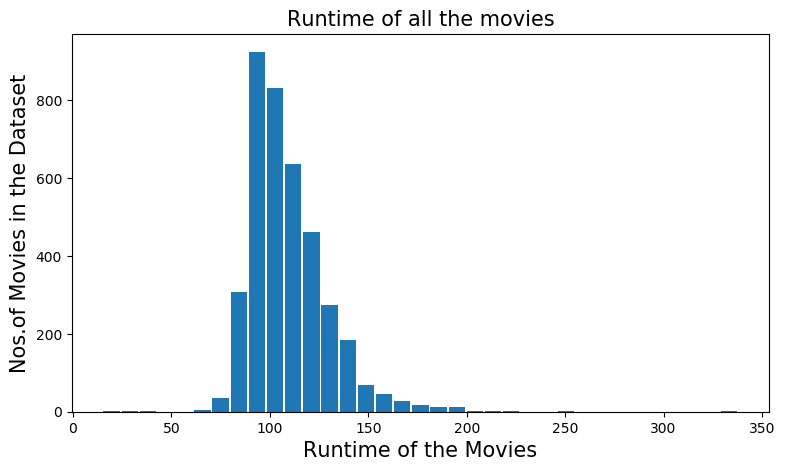

In [21]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('Nos.of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=15)

#giving a histogram plot
plt.hist(df['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

The distribution of the above formed graph is positively skewed or right skewed! Most of the movies are timed between 80 to 115 minutes. Almost 1000 and more no.of movies fall in this criteria.

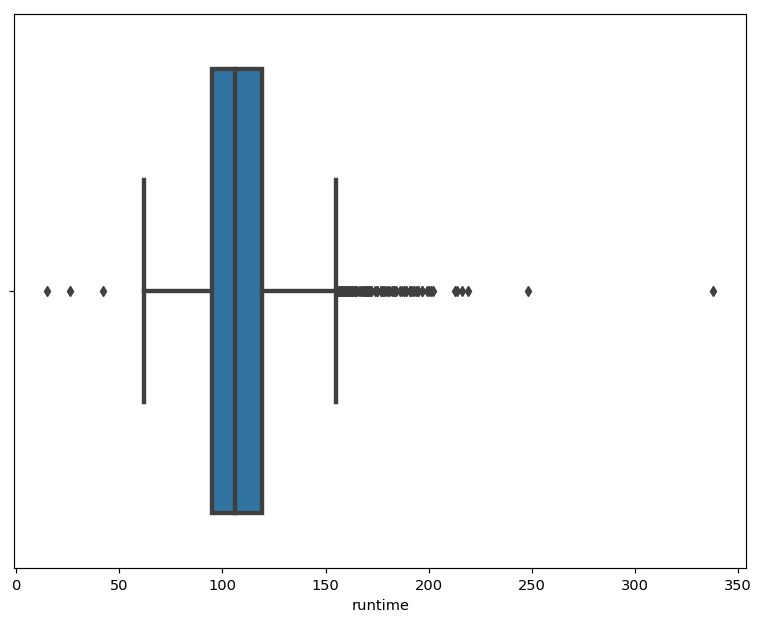

In [22]:
#The First plot is box plot of the runtime of the movies 
plt.figure(figsize=(9,7), dpi = 105)

#using seaborn to generate the boxplot
sns.boxplot(df['runtime'], linewidth = 3)
#diplaying the plot
plt.show()

In [23]:
#getting specific runtime 
df['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

By looking at both the plot and calculations, we can conclude that..

1) 25% of movies have a runtime of less than 95 minutes

2) 50% of movies have a runtime of less than 109 minutes. (median)

3) 75% of movies have a runtime of less than 119 minutes

****************************************************

Question 7) : Year of release vs Profitability

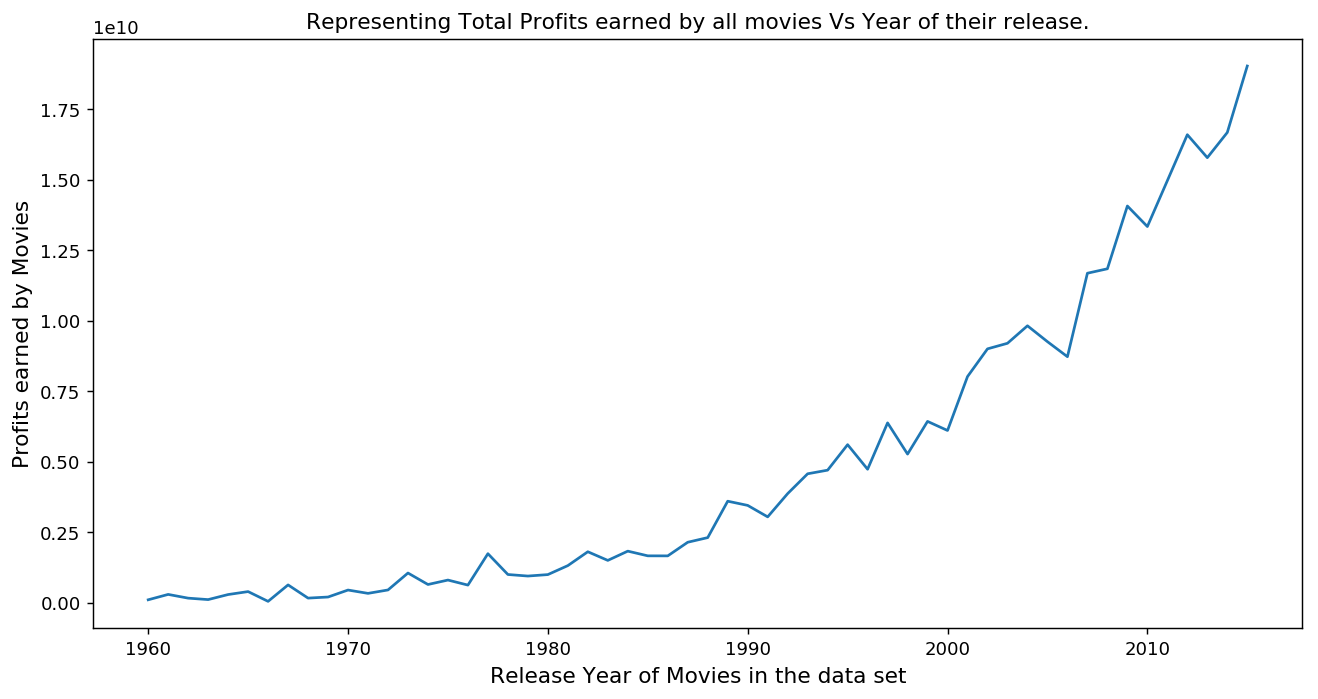

In [24]:
#We will be using Line plot for this analysis
#Since we want to know the profits of movies for every year therefore we have to sum up all the movies of a particular year

profits_year = df.groupby('release_year')['profit_earned'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plt.title('Representing Total Profits earned by all movies Vs Year of their release.')

#plotting the graph
plt.plot(profits_year)

#displaying the line plot
plt.show()

In [25]:
#To find that which year made the highest profit?
profits_year.idxmax()

2015

So we can conclude both graphically as well as by calculations that year 2015 was the year where movies made the highest profit.

We are now done with analysing the given dataset.We will now find characteristics of profitable movies.

************************************

Before moving further we need to clean our data again. We will be considering only those movies who have earned a significant amount of profit.

In [26]:
#selecting the movies having profit $50M or more
profit_data = df[df['profit_earned'] >= 50000000]

#reindexing new data
profit_data.index = range(len(profit_data))

#we will start from 1 instead of 0
profit_data.index = profit_data.index + 1

#printing the changed dataset
profit_data.head(3)

,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,genres,release_date,release_year
1,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
2,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
3,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015


In [27]:
#counting the no.of rows in the new data base
len(profit_data)

1338

So our dataset is reduced to 1338 from 3853

***************

Question 8) : Succesful Genres


In [28]:
#function which will take any column as argument from and keep its track 
def data(column):
    #will take a column, and separate the string by '|'
    data = profit_data[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [29]:
#variable to store the retured value
count = data('genres')
#printing top 5 values
count.head()

Comedy       492
Drama        481
Action       464
Thriller     405
Adventure    379
dtype: int64

Lets to a graphical analysis of the above collected data.

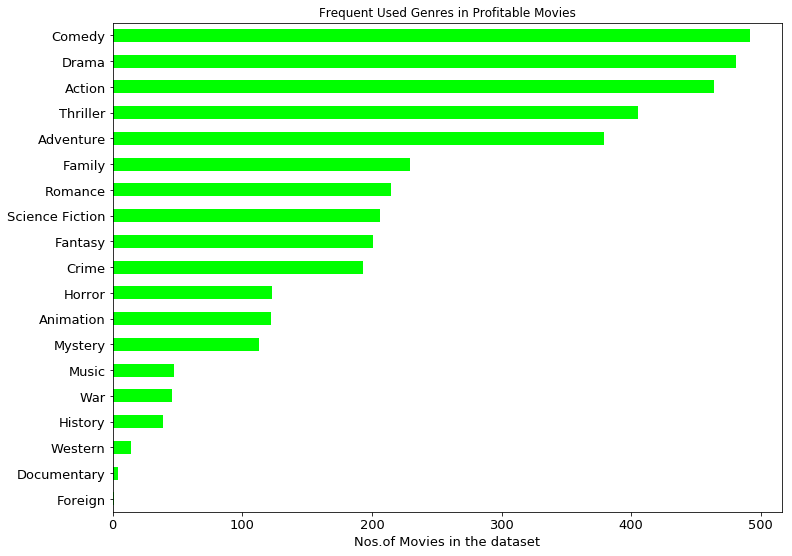

In [30]:
#lets plot the points in descending order top to bottom as we have data in same format.
count.sort_values(ascending = True, inplace = True)

#ploting
lt = count.plot.barh(color = '#00FF00', fontsize = 13)

#title
lt.set(title = 'Frequent Used Genres in Profitable Movies')

# on x axis
lt.set_xlabel('Nos.of Movies in the dataset', color = 'black', fontsize = '13')

#figure size(width, height)
lt.figure.set_size_inches(12, 9)

#ploting the graph
plt.show()

Question 8) : Most Frequent Cast

We will call the same function data(column) again for this analysis.

In [31]:
#variable to store the retured value
count = data('cast')
#printing top 5 values
count.head()

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

As expecteted Tom Cruise is on the top with total 27 cast followed by Brad Pitt with 25 and Tom Hanks with 22.



Question 9) : Average Budget of the movies

In [32]:
#New function to find average 
def profit_avg(column):
    return profit_data[column].mean()

In [33]:
# calling the above function for budget
profit_avg('budget')

60444957.76083707

So the movies having profit of 50 million dollar and more have an average budget of 60 million dollar.



*************************

 Question 10) : Average Revenue earned by the movies

In [34]:
# calling the above function for revenue
profit_avg('revenue')

254957662.59491777

So the movies having profit of 50 million dollar and more have an average revenue of 255 million dollar.

***************

Last Question 10) : Average duration of the movies

In [35]:
# calling the above function for 
profit_avg('runtime')

113.66741405082212

So the movies having profit of 50 million dollar and more have an average duration of 113 minutes.




***********

<a id='conclusions'></a>
## Conclusions
For a Movie to be in successful criteria

1) Average Budget must be around 60 millon dollar

2) Average duration of the movie must be 113 minutes

3) Any one of these should be in the cast :Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone,Cameron Diaz

4) Genre must be : Action, Adventure, Thriller, Comedy, Drama.

5) By doing all this the movie might be one of the hits and hence can earn an average revenue of around 255 million dollar.

